<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


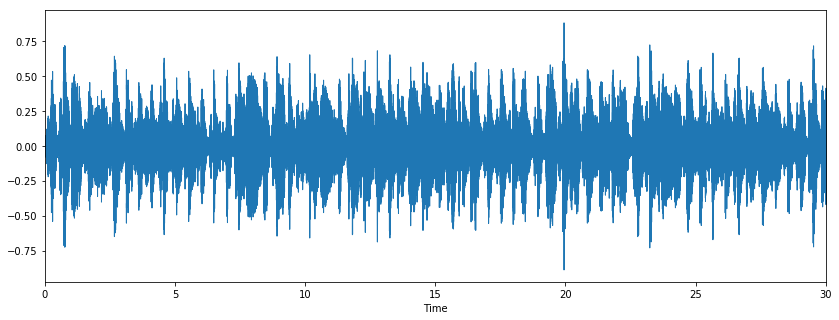

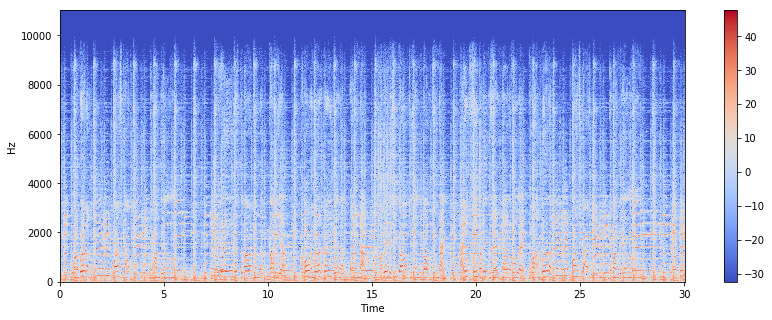

In [156]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa
import pandas as pd
import numpy as np
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

audio_path='C:/Users/Anmol Kathail/Desktop/CIS519/Project/genres/blues/blues.00000.au'
sampling_rate=22050

x,sr = librosa.load(audio_path, sr=sampling_rate)

print(type(x),type(sr))

print(x.shape, sr)

plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sampling_rate)
plt.show

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, x_axis='time', y_axis='hz')
plt.colorbar()

In [75]:
g='rock' #g=['blues', 'metal', 'pop', 'rock']
for filename in os.listdir(f'C:/Users/Anmol Kathail/Desktop/CIS519/Project/genres/{g}'):
        songname = f'C:/Users/Anmol Kathail/Desktop/CIS519/Project/genres/{g}/{filename}'
        
        y, sr = librosa.load(songname, mono=True, duration=30)
        
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('C:/Users/Anmol Kathail/Desktop/CIS519/Project/rockdata.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

data = pd.read_csv('519data.csv')
data = np.array(data.drop(['filename'],axis=1))
labels=data[...,25]
features=data[...,0:25]
data = features
#features=(features-features.mean())/features.std()
ftrframe = pd.DataFrame({'chroma':data[:,0],'spectral centroid':data[:,1],'spectral bandwidth':data[:,2],'rolloff':data[:,3],'zero crossing rate':data[:,4],
                       '1':data[:,5],'2':data[:,6],'3':data[:,7],'4':data[:,8],'5':data[:,9],'6':data[:,10],
                       '7':data[:,11],'8':data[:,12],'9':data[:,13],'10':data[:,14],'11':data[:,15],
                       '12':data[:,16],'13':data[:,17],'14':data[:,18],'15':data[:,19],'16':data[:,20],
                       '17':data[:,21],'18':data[:,22],'19':data[:,23],'20':data[:,24]})

#improving feature selection
X = ftrframe
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)
X = X[X.columns[selector.get_support(indices=True)]]
#this removed 2 features 

#based on code in box below we know the optimal number of features is 4
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#need to normalize first to [0,1]
df = X
Xn=(df-df.min())/(df.max()-df.min())
sel= SelectKBest(chi2, k= 4).fit(Xn, labels)
X_new = Xn[Xn.columns[sel.get_support(indices=True)]]

print(features.shape)
print(X_new.shape)


gradboost=[]
# randfor=[]
# SVM=[]
# adaboost=[]
# logreg=[]
# sgd=[]

for i in range(1,22):
    test_size=0.03*i
    X_train, X_test, y_train, y_test = train_test_split(X_new,labels, test_size=test_size, random_state=0)
    
    #clf=GradientBoostingClassifier(n_estimators=300, max_depth=3, max_features=7)
    #getting rid of max features = 7 so we can try optimal 4 features
    clf=GradientBoostingClassifier(n_estimators=300, max_depth=3)
    clf.fit(X_train,y_train)
    test=clf.score(X_test,y_test)
    train=clf.score(X_train,y_train)
    gradboost.append((test,train))
    
#     clf=RandomForestClassifier(n_estimators=300, max_depth=5, criterion='entropy')
#     clf.fit(X_train,y_train)
#     test=clf.score(X_test,y_test)
#     train=clf.score(X_train,y_train)
#     randfor.append((test,train))
    
#     clf=svm.SVC(C=1000)
#     clf.fit(X_train,y_train)
#     test=clf.score(X_test,y_test)
#     train=clf.score(X_train,y_train)
#     SVM.append((test,train))
    
#     clf=AdaBoostClassifier(n_estimators=300)
#     clf.fit(X_train,y_train)
#     test=clf.score(X_test,y_test)
#     train=clf.score(X_train,y_train)
#     adaboost.append((test,train))
    
#     clf=LogisticRegression()
#     clf.fit(X_train,y_train)
#     test=clf.score(X_test,y_test)
#     train=clf.score(X_train,y_train)
#     logreg.append((test,train))
    
#     clf= SGDClassifier()
#     clf.fit(X_train,y_train)
#     test=clf.score(X_test,y_test)
#     train=clf.score(X_train,y_train)
#     sgd.append((test,train))
    

(400, 25)
(400, 4)


In [140]:
l = list(ftrframe.columns.values)
l

['chroma',
 'spectral centroid',
 'spectral bandwidth',
 'rolloff',
 'zero crossing rate',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20']

In [15]:
#code used to see optimal number of features needed
#initially have 25 features
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = AdaBoostClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X, labels)
print("Optimal number of features : %d" % rfecv.n_features_)
#result is 4!

Optimal number of features : 4


In [80]:
X_new

array([[0.40062623, 0.61451491, 0.3512124 , 0.41751139],
       [0.41493209, 0.54939967, 0.44511906, 0.46454119],
       [0.29900858, 0.50731561, 0.35209473, 0.4283907 ],
       ...,
       [0.37053261, 0.71991941, 0.37456771, 0.28651869],
       [0.32724153, 0.75772898, 0.41416191, 0.50474605],
       [0.31885572, 0.72073367, 0.47241579, 0.40709961]])

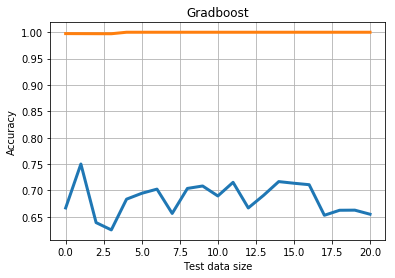

In [139]:
import matplotlib.pyplot as plt
# gradboost
# randfor
# SVM
# adaboost
# logreg
# sgd
# np.savetxt('C:/Users/Anmol Kathail/Desktop/CIS519/Project/sgd.txt',sgd,delimiter=',')


# plt.figure(1) 
# plt.subplot(311)             
plt.plot(gradboost,linewidth=3)
# # plt.subplot(312)
# # plt.plot(randfor)
# # plt.subplot(313)
# # plt.plot(SVM)

plt.xlabel('Test data size')
plt.ylabel('Accuracy')
plt.title('Gradboost')
plt.grid(True)

plt.show()

In [ ]:
#choose to use Gradient Boost bc training accuracy good (with held out fold) and validation accuracy good. 
#important to check testing vs validation accuracy to make sure we are not overfitting
#take feature matrix

In [39]:
#take a song and predict label
#first download song
import librosa
audio_path = 'poptest.mp3'
y , sr = librosa.load(audio_path)
chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zcr = np.mean(librosa.feature.zero_crossing_rate(y))
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis = 1)



In [59]:
ftrtest = [chroma_stft, spec_cent, spec_bw, rolloff, zcr]
m = (mfcc.T).tolist()
ftrtest = np.array(ftrtest + m)

In [67]:
ftrtest

array([[ 4.39417570e-01,  2.47028528e+03,  2.67106133e+03,
         5.41736767e+03,  7.71733181e-02, -1.19014994e+02,
         6.96388239e+01,  2.93487256e+01,  2.87931671e+01,
         1.07420543e+01,  6.82788502e+00,  4.48100908e+00,
        -4.21380415e-01,  6.82022463e+00,  8.68616127e+00,
        -9.88803939e+00,  6.90741589e+00,  4.41538961e-01,
         5.58472192e+00,  1.88039089e+00,  5.66893591e+00,
         1.97109431e+00,  5.97758099e+00,  5.65401282e+00,
         1.04651416e+01]])

In [71]:
ftrtest = ftrtest.reshape(1, -1)
ftrtest4 = sel.transform(ftrtest)
ans = int(np.asscalar(clf.predict(ftrtest4)))
ans

2

In [148]:
import matplotlib.pyplot as plt
import librosa.display
frames = range(len(spec_bw))
t = librosa.frames_to_time(frames)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spec_bw), color='r') # normalize for visualization purposes

TypeError: object of type 'numpy.float64' has no len()

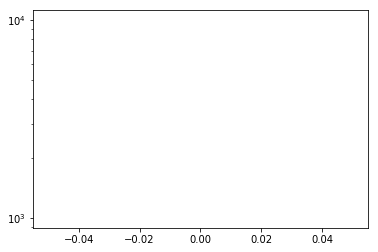

In [143]:
plt.semilogy(spec_bw.T, label='Spectral bandwidth')